# 결정트리 DecsionTree

In [61]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier


In [62]:
iris = load_iris()
X_train, X_test, y_tain, y_test = train_test_split(
    iris.data, iris.target, test_size = 0.2, stratify=iris.target, random_state=156
)

In [63]:
dt_clf = DecisionTreeClassifier(random_state=156)
dt_clf.fit(X_train, y_tain)

DecisionTreeClassifier(random_state=156)

In [64]:
from sklearn.tree import export_graphviz

export_graphviz(dt_clf, out_file='tree.dot',class_names=iris.target_names,
    feature_names=iris.feature_names, impurity=True, filled=True)

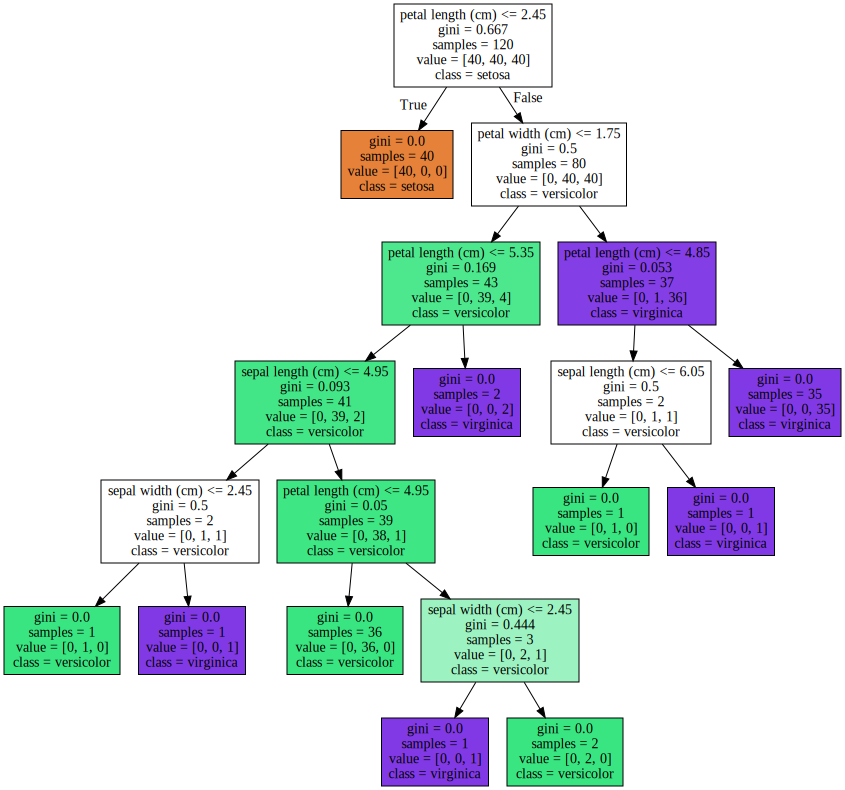

In [65]:
import graphviz

with open('tree.dot') as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)


In [66]:
pred = dt_clf.predict(X_test)

In [67]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,pred)

0.9333333333333333

## 제약조건
### max_depth = 3

In [68]:
dt_clf2 = DecisionTreeClassifier(max_depth = 3, random_state=156)
dt_clf2.fit(X_train, y_tain)

DecisionTreeClassifier(max_depth=3, random_state=156)

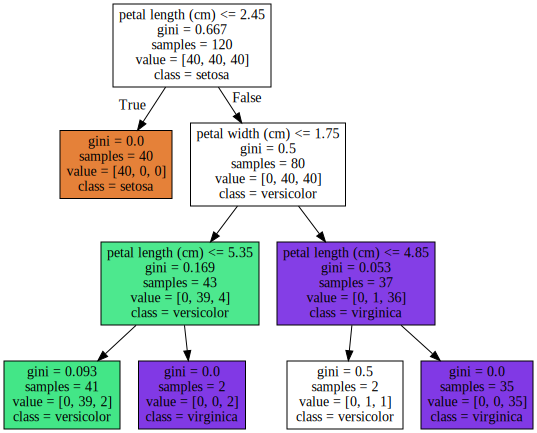

In [69]:
export_graphviz(dt_clf2, out_file='tree.dot',class_names=iris.target_names,
    feature_names=iris.feature_names, impurity=True, filled=True)
with open('tree.dot') as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

In [70]:
pred2 = dt_clf2.predict(X_test)
accuracy_score(y_test,pred2)

0.9333333333333333

 ## 제약조건
### min_samples_split = 4

In [71]:
dt_clf3 = DecisionTreeClassifier(min_samples_split = 4, random_state=156)
dt_clf3.fit(X_train, y_tain)

DecisionTreeClassifier(min_samples_split=4, random_state=156)

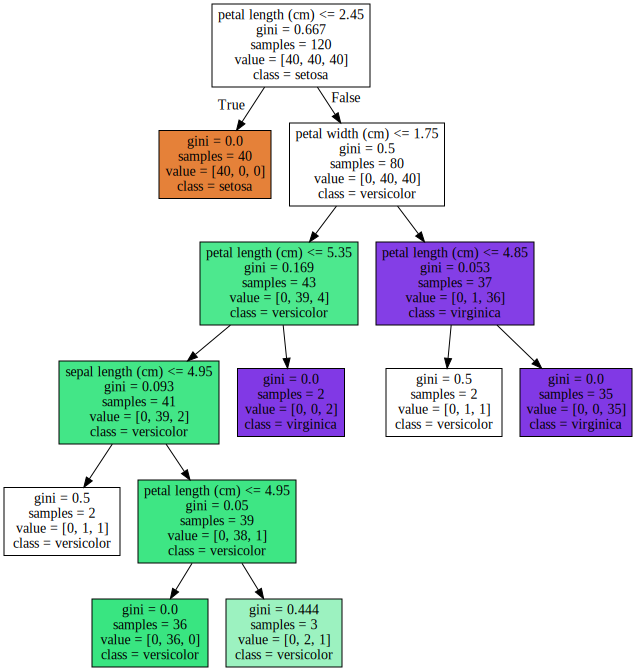

In [72]:
export_graphviz(dt_clf3, out_file='tree3.dot',class_names=iris.target_names,
    feature_names=iris.feature_names, impurity=True, filled=True)
with open('tree3.dot') as f:
    dot_graph3 = f.read()
graphviz.Source(dot_graph3)

In [73]:
pred3 = dt_clf3.predict(X_test)
accuracy_score(y_test,pred3)

0.9333333333333333

- min_samples_leaf = 4

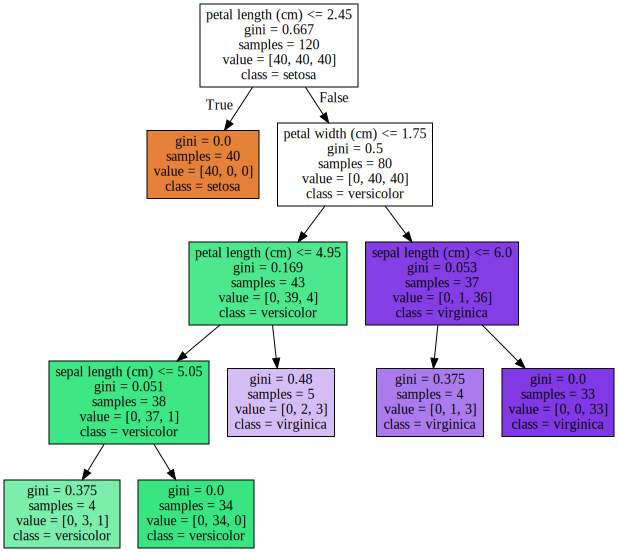

In [74]:
dt_clf4 = DecisionTreeClassifier(min_samples_leaf = 4, random_state=156)
dt_clf4.fit(X_train, y_tain)
export_graphviz(dt_clf4, out_file='tree.dot',class_names=iris.target_names,
    feature_names=iris.feature_names, impurity=True, filled=True)
with open('tree.dot') as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

In [75]:
pred4 = dt_clf4.predict(X_test)
accuracy_score(y_test,pred4)

1.0

### Feature 중요도

In [76]:
print(dt_clf.feature_importances_)
print(dt_clf2.feature_importances_)
print(dt_clf3.feature_importances_)
print(dt_clf4.feature_importances_)

[0.023202   0.02916667 0.56265333 0.384978  ]
[0.         0.         0.59042237 0.40957763]
[0.01116731 0.         0.58711652 0.40171618]
[0.01197472 0.         0.57518024 0.41284504]


In [77]:
import seaborn as sns
import numpy as np
%matplotlib inline

In [78]:
for name, value in zip(iris.feature_names, dt_clf.feature_importances_):
    print(f'{name} : {value:.4f}')

sepal length (cm) : 0.0232
sepal width (cm) : 0.0292
petal length (cm) : 0.5627
petal width (cm) : 0.3850


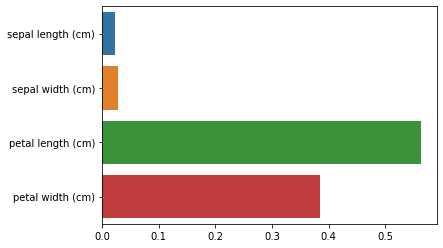

In [80]:
sns.barplot(x=dt_clf.feature_importances_, y=iris.feature_names);

In [82]:
import pandas as pd
df = pd.DataFrame({'name':iris.feature_names,'제약 무' : dt_clf.feature_importances_,
                    'max_depth = 3':dt_clf2.feature_importances_,
                    'min_samples_split = 4':dt_clf3.feature_importances_,
                    'min_samples_leaf = 4':dt_clf3.feature_importances_,})
df

,name,제약 무,max_depth = 3,min_samples_split = 4,min_samples_leaf = 4
0,sepal length (cm),0.023202,0.000000,0.011167,0.011167
1,sepal width (cm),0.029167,0.000000,0.000000,0.000000
2,petal length (cm),0.562653,0.590422,0.587117,0.587117
3,petal width (cm),0.384978,0.409578,0.401716,0.401716
